In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [107]:
df=pd.read_csv('dataset.csv')

pd.set_option('display.max_columns',None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [108]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]=df[i].replace({'No internet service' : 'No'})

df["MultipleLines"]=df["MultipleLines"].replace({'No phone service' : 'No'})

In [109]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [110]:
data1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
data2 = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity']
data3 = ['OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV']
data4 = ['StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod']

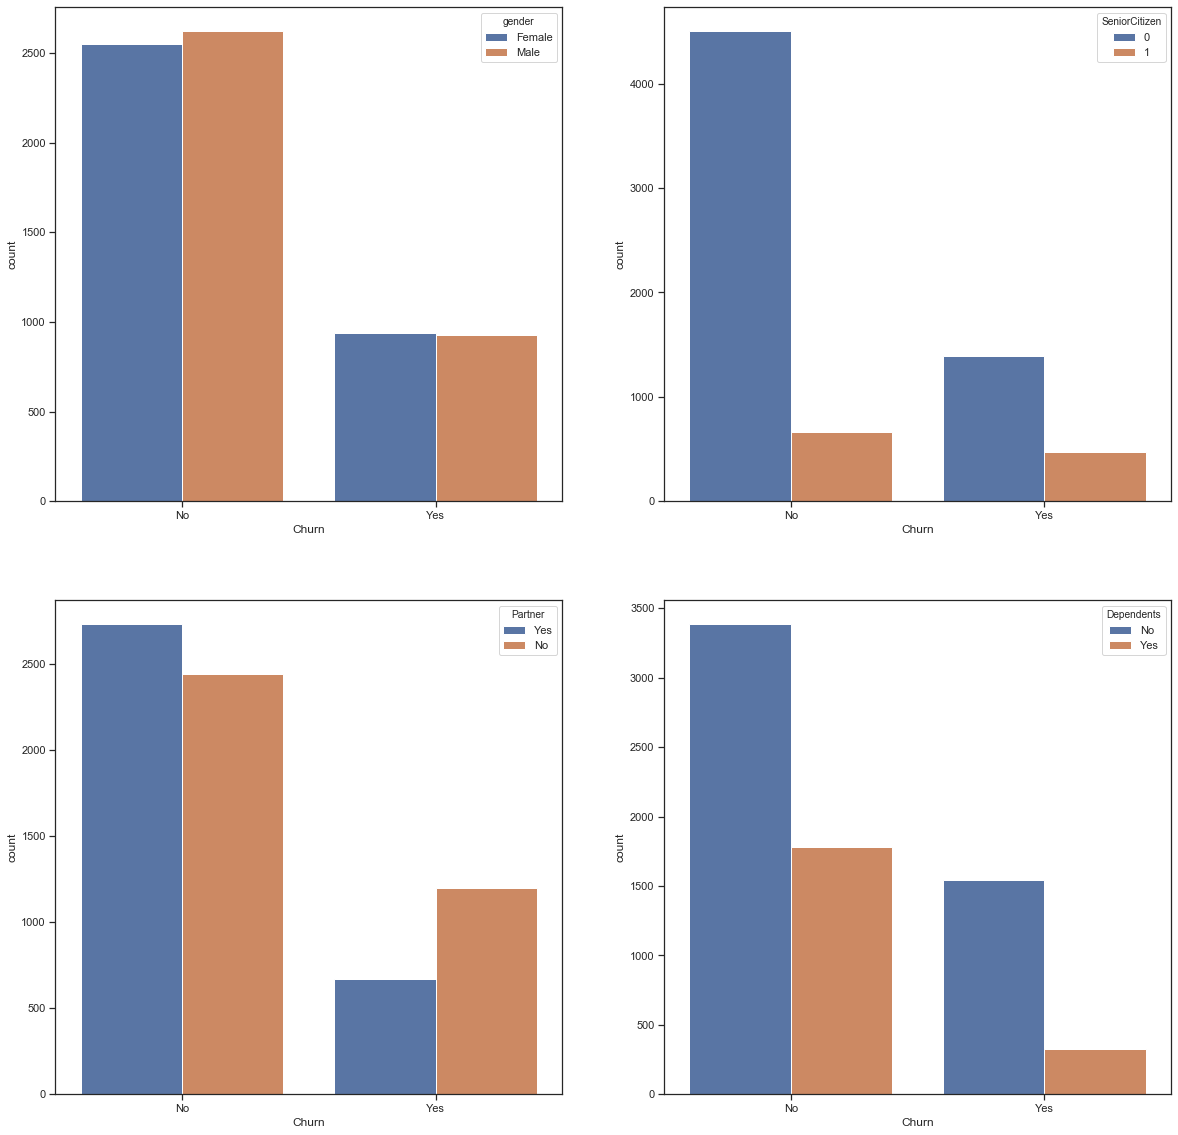

In [111]:
fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data1):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

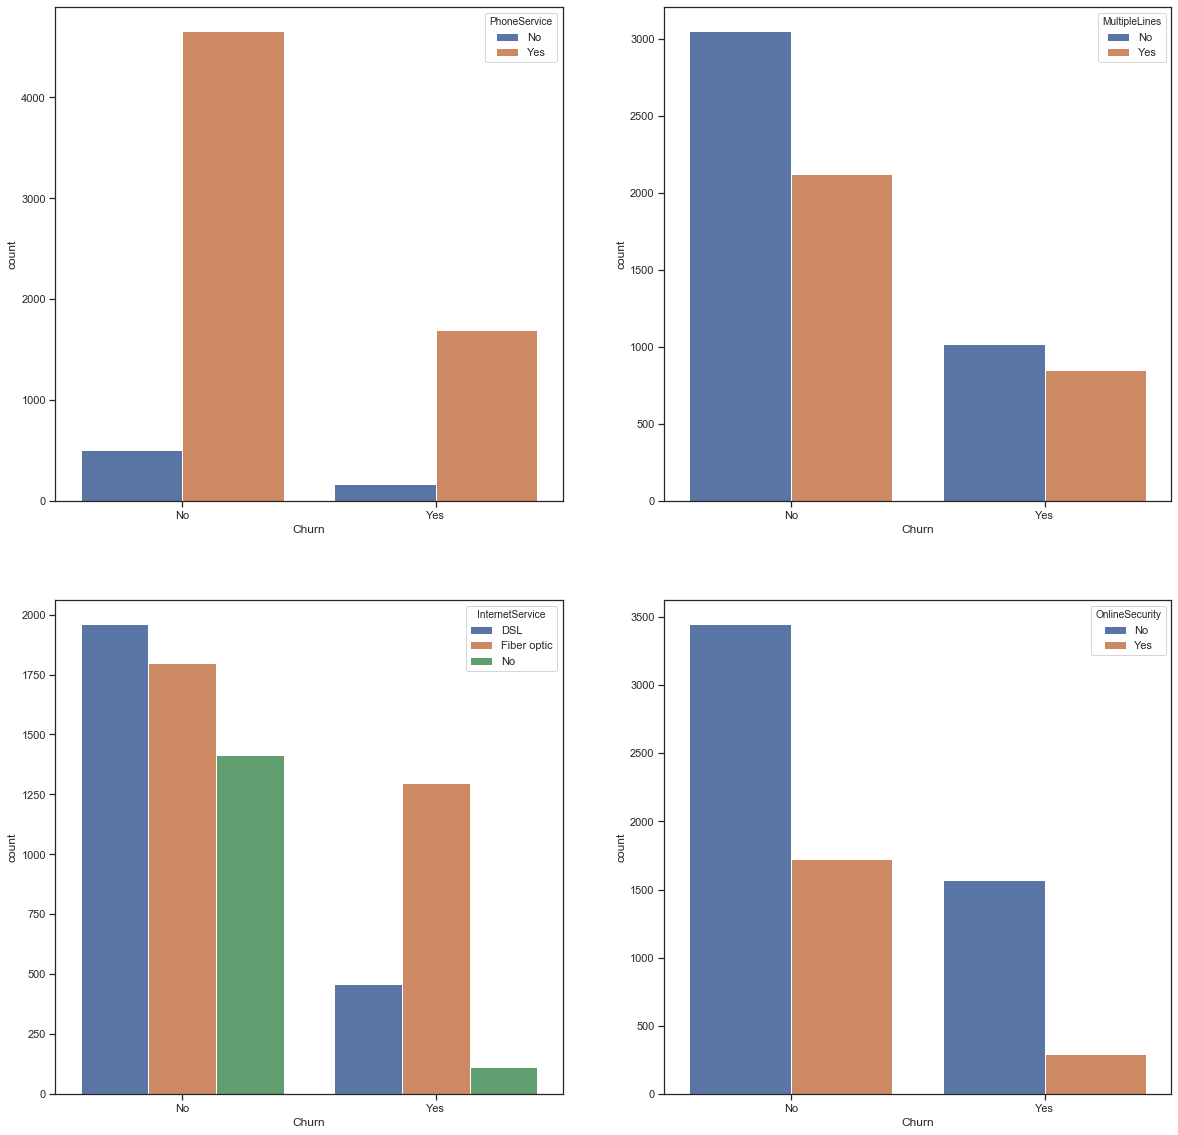

In [112]:
fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data2):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

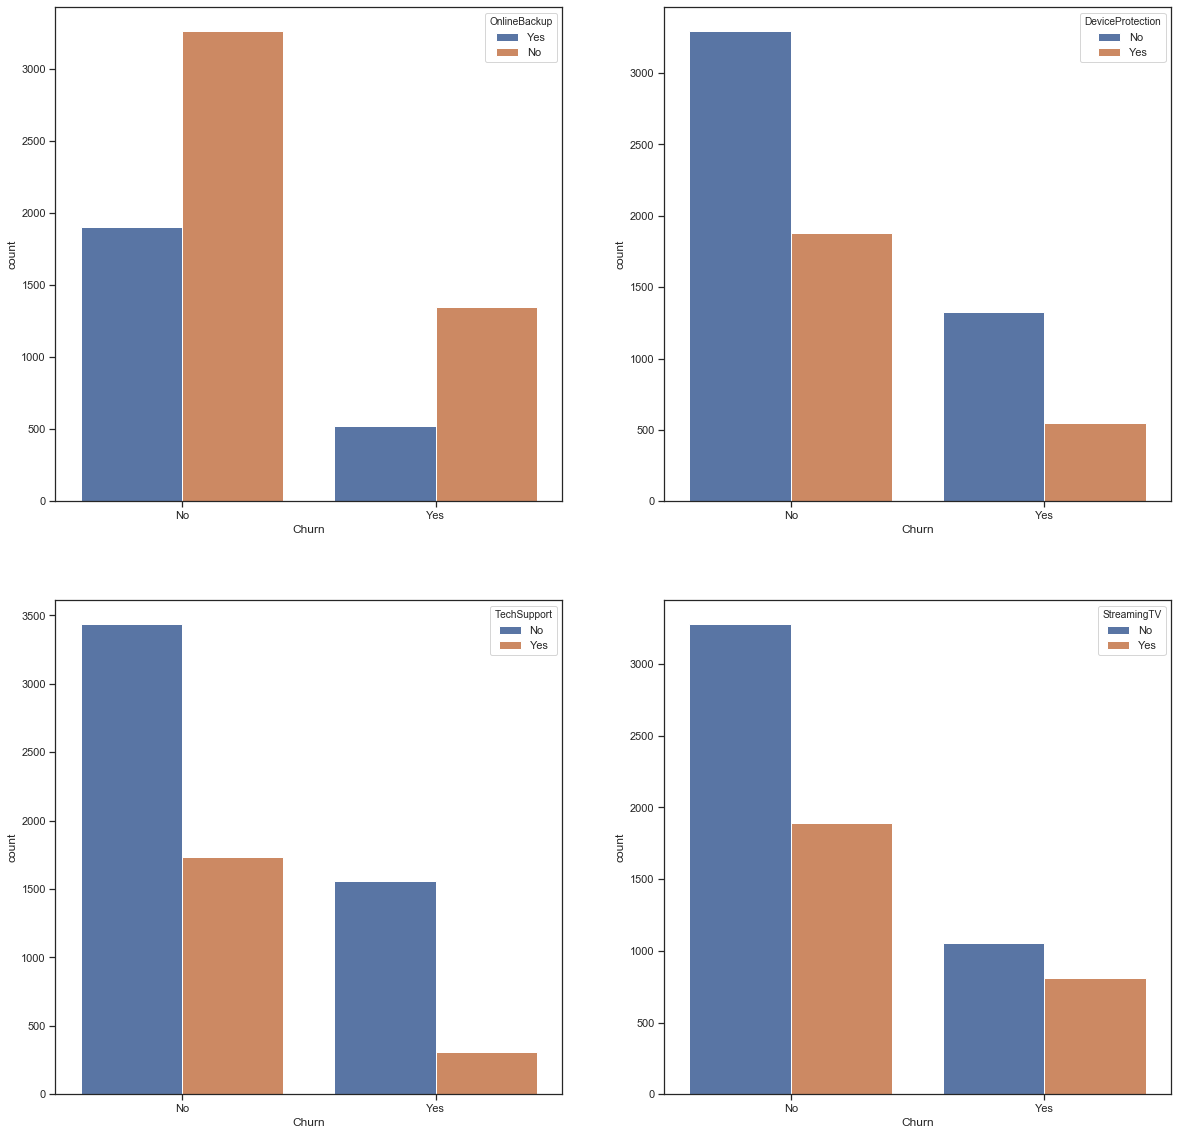

In [113]:
fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data3):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

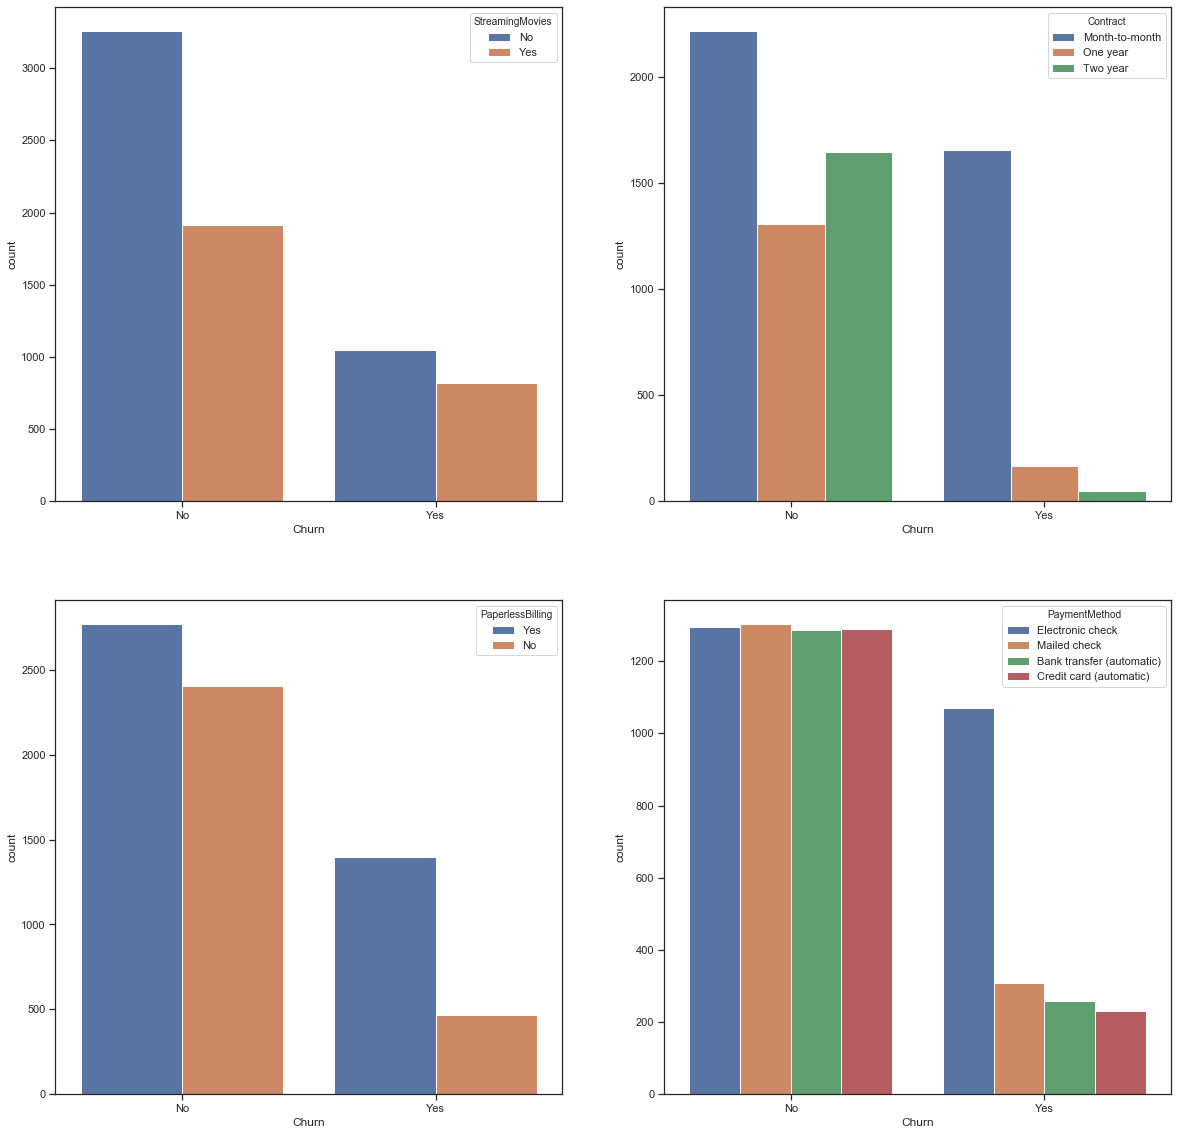

In [114]:
fig , ax = plt.subplots(2,2,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data4):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)
plt.show()

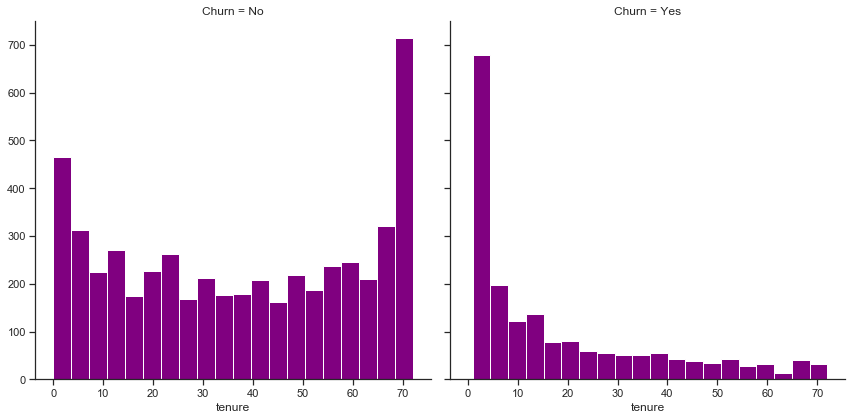

In [117]:
NumHistTenure = sns.FacetGrid(df,col="Churn",height=6,aspect=1)
NumHistTenure = NumHistTenure.map(plt.hist, "tenure",bins=20,color="purple")
plt.show()

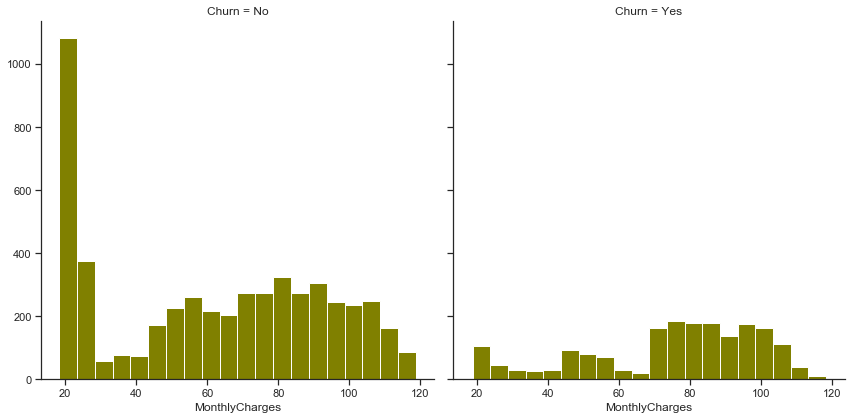

In [118]:
NumHistMC = sns.FacetGrid(df,col="Churn",height=6,aspect=1)
NumHistMC = NumHistMC.map(plt.hist, "MonthlyCharges",bins=20,color="olive")
plt.show()

In [119]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [120]:
replace_col= [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Partner','Dependents',"PhoneService","MultipleLines","PaperlessBilling"]

for i in replace_col :
    df[i]=df[i].map({'No':0,'Yes':1})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,No


In [121]:
df.drop(['TotalCharges'],axis=1,inplace=True)

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [135]:
labelencoder_X_0 = LabelEncoder()
X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0]) 
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
labelencoder_X_14 = LabelEncoder()
X[:, 14] = labelencoder_X_14.fit_transform(X[:, 14])
labelencoder_X_16 = LabelEncoder()
X[:, 16] = labelencoder_X_16.fit_transform(X[:, 16])

X = X.astype(float)
labelencoder_y= LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

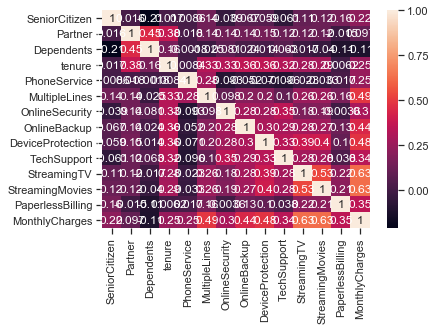

In [123]:
Var_Corr = df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=59)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [126]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
XGB=metrics.accuracy_score(y_test, y_pred)*100
print('Results using XGBoost Classifier is')
print('Accuracy :',XGB)
print('Precision :',metrics.precision_score(y_test,y_pred))
print('Recall :',metrics.recall_score(y_test,y_pred))
print('Area Under ROC Curve',metrics.roc_auc_score(y_test,y_pred))
print()

Results using XGBoost Classifier is
Accuracy : 82.07948899929028
Precision : 0.6860670194003528
Recall : 0.5432960893854749
Area Under ROC Curve 0.7293074167193787



In [127]:
svm = SVC() 
svm.fit(X_train,y_train)
p = svm.predict(X_test)
SVM=metrics.accuracy_score(y_test, p)*100
print('Results using Support Vector Machine Classifier is')
print('Accuracy :',SVM)
print('Precision :',metrics.precision_score(y_test,p))
print('Recall :',metrics.recall_score(y_test,p))
print('Area Under ROC Curve',metrics.roc_auc_score(y_test,p))
print()

Results using Support Vector Machine Classifier is
Accuracy : 81.29879347054649
Precision : 0.6727605118829981
Recall : 0.5139664804469274
Area Under ROC Curve 0.7144047435536255



In [128]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
p = clf.predict(X_test)
RF=metrics.accuracy_score(y_test, p)*100
print('Results using Random Forest Classifier is')
print('Accuracy :',RF)
print('Precision :',metrics.precision_score(y_test,p))
print('Recall :',metrics.recall_score(y_test,p))
print('Area Under ROC Curve',metrics.roc_auc_score(y_test,p))
print()

Results using Random Forest Classifier is
Accuracy : 79.8083747338538
Precision : 0.6368715083798883
Recall : 0.4776536312849162
Area Under ROC Curve 0.6924424198289472



In [130]:
Accuracy=[]
Accuracy.append(XGB)
Accuracy.append(SVM)
Accuracy.append(RF)
Accuracy

[82.07948899929028, 81.29879347054649, 79.8083747338538]

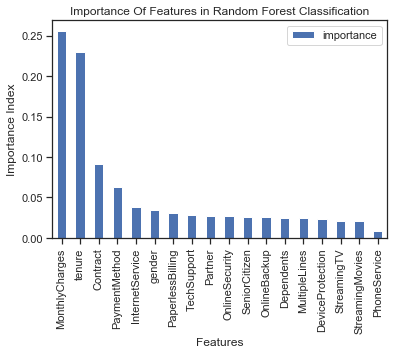

In [131]:
feature_importances = pd.DataFrame(clf.feature_importances_, index=['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges'],columns=['importance']).sort_values('importance',ascending=False)
feature_importances['Features'] = feature_importances.index
ax = feature_importances.plot.bar(x='Features', y='importance', rot=90)
ax.set(title="Importance Of Features in Random Forest Classification", ylabel="Importance Index")
plt.show()

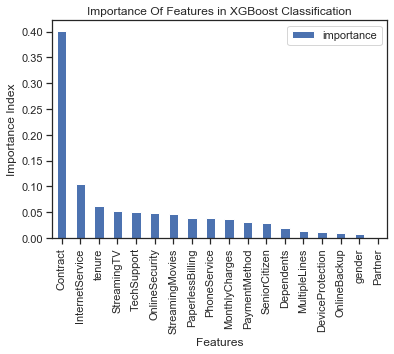

In [132]:
feature_importances = pd.DataFrame(model.feature_importances_, index=['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges'],columns=['importance']).sort_values('importance',ascending=False)
feature_importances['Features'] = feature_importances.index
ax = feature_importances.plot.bar(x='Features', y='importance', rot=90)
ax.set(title="Importance Of Features in XGBoost Classification", ylabel="Importance Index")
plt.show()

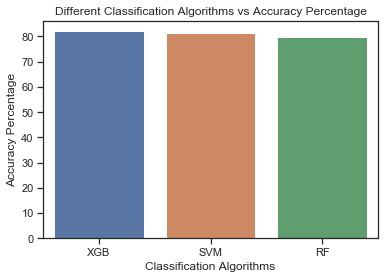

In [133]:
ax1=sns.barplot(x=['XGB','SVM','RF'],y=Accuracy)
ax1.set(title="Different Classification Algorithms vs Accuracy Percentage", xlabel="Classification Algorithms", ylabel="Accuracy Percentage")
plt.xticks(rotation=0)
plt.show()